In [29]:
import wget

url = 'https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv'

wget.download(url, 'glt.csv')


'glt (1).csv'

In [30]:
import csv

f_names = True
temp_features = []
temp_list = []

with open('glt.csv', 'r') as f:
    for line in csv.reader(f):
        if f_names:
            f_names = False
            temp_features.append(line)
        else:
            temp_list.append(line)

In [31]:
import math

def rec_mean(a, b, l, i):
    if b != '':
        return (a + float(b)) / 2
    else:
        return (a + rec_mean(a, l[i+1][1], l, i+1)) /2

a = float(temp_list[0][1])

for i, el in enumerate(temp_list):
    if el[1] == '':
        temp_list[i][1] = rec_mean(a, temp_list[i+1][1], temp_list, i+1)
    else:
        a = float(el[1])

In [32]:
import random as rand
cities = set(x[3] for x in temp_list)

# cit = rand.sample(cities, 1)
cit = 'Bangkok'
cit_temp = []
for el in temp_list:
    if str(el[3]) == str(cit):
        cit_temp.append(float(el[1]))

cit_t = sorted(cit_temp)

print(cit)
print(cit_t[:4])
print(cit_t[-4:])

Bangkok
[71.4092, 71.4686, 72.05539999999999, 72.15259999999999]
[87.76939999999999, 87.83959999999999, 87.9548, 88.00699999999999]


(array([ 14.,  48., 171., 224., 341., 419., 596., 354., 141.,  44.]),
 array([71.4092 , 73.06898, 74.72876, 76.38854, 78.04832, 79.7081 ,
        81.36788, 83.02766, 84.68744, 86.34722, 88.007  ]),
 <BarContainer object of 10 artists>)

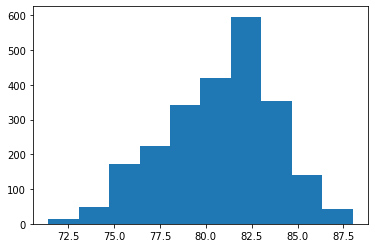

In [33]:
import matplotlib.pyplot as plt

plt.hist(cit_temp)

(array([ 14.,  48., 171., 224., 341., 419., 596., 354., 141.,  44.]),
 array([21.894 , 22.8161, 23.7382, 24.6603, 25.5824, 26.5045, 27.4266,
        28.3487, 29.2708, 30.1929, 31.115 ]),
 <BarContainer object of 10 artists>)

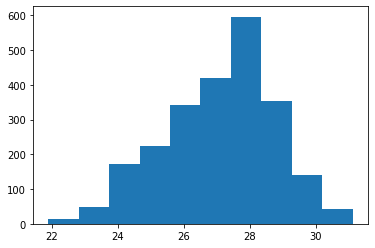

In [34]:
def kv_to_c(temp):
    return (temp - 32)/1.8

cit_temp = [kv_to_c(x) for x in cit_temp]

plt.hist(cit_temp)